In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [3]:
import numpy as np

def five_point_derivative(f, x, h):
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12 * h**2)


def f(x):
    return np.cos(x)


x_vals = np.linspace(0, 2*np.pi, 10)
f_vals = f(x_vals)


x_eval = np.pi / 8
h = 0.05
segunda_derivada_aprox = five_point_derivative(f, x_eval, h)


segunda_derivada_real = -np.cos(x_eval)

err_ab = np.abs(segunda_derivada_real - segunda_derivada_aprox)

print(f"Segunda derivada aproximada: {segunda_derivada_aprox}")
print(f"Segunda derivada exacta: {segunda_derivada_real}")
print(f"Error absoluto: {err_ab}")


Segunda derivada aproximada: -0.9238794683673055
Segunda derivada exacta: -0.9238795325112867
Error absoluto: 6.414398123766318e-08


#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

<ipython-input-8-b1e725974e11>:24: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  true_f1 = derivative(f, x_target, dx=1e-6)
<ipython-input-8-b1e725974e11>:25: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  true_f2 = derivative(f, x_target, dx=1e-6, n=2)


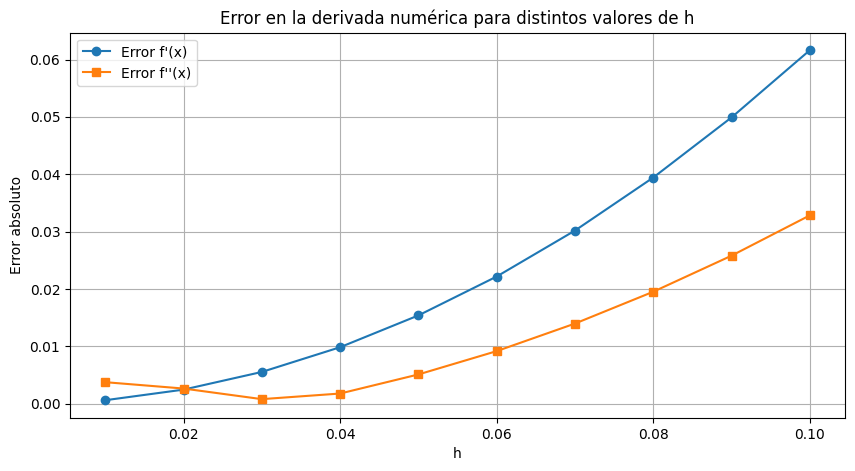

Valor óptimo de h para f'(x): 0.01
Valor óptimo de h para f''(x): 0.030000000000000006
f'(2.0) con numpy.gradient: 22.2362001593272, error absoluto: 0.06903186193379796
f''(2.0) con numpy.gradient: 29.686486771002524, error absoluto: 0.12613260654295644


In [8]:
from scipy.misc import derivative

def f(x):
    return x * np.exp(x)

# Diferencias finitas
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_diff(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

# Parámetros
x_target = 2.0
h_vals = np.linspace(0.01, 0.1, 10)

# Derivadas exactas
true_f1 = derivative(f, x_target, dx=1e-6)
true_f2 = derivative(f, x_target, dx=1e-6, n=2)

errors_f1 = []
errors_f2 = []


for h in h_vals:
    f1_approx = centered_diff(f, x_target, h)
    f2_approx = second_diff(f, x_target, h)
    errors_f1.append(abs(true_f1 - f1_approx))
    errors_f2.append(abs(true_f2 - f2_approx))

# Comparación con numpy.gradient
x_points = np.linspace(1.8, 2.2, 6)
y_points = f(x_points)
grad = np.gradient(y_points, x_points)
grad2 = np.gradient(grad, x_points)

f1_numpy = np.interp(x_target, x_points, grad)
f2_numpy = np.interp(x_target, x_points, grad2)

# Gráfico de errores
plt.figure(figsize=(10, 5))
plt.plot(h_vals, errors_f1, label="Error f'(x)", marker='o')
plt.plot(h_vals, errors_f2, label="Error f''(x)", marker='s')
plt.xlabel("h")
plt.ylabel("Error absoluto")
plt.legend()
plt.grid()
plt.title("Error en la derivada numérica para distintos valores de h")
plt.show()

# Encontrar el valor óptimo de h
optimal_h_f1 = h_vals[np.argmin(errors_f1)]
optimal_h_f2 = h_vals[np.argmin(errors_f2)]

print(f"Valor óptimo de h para f'(x): {optimal_h_f1}")
print(f"Valor óptimo de h para f''(x): {optimal_h_f2}")

print(f"f'(2.0) con numpy.gradient: {f1_numpy}, error absoluto: {abs(true_f1 - f1_numpy)}")
print(f"f''(2.0) con numpy.gradient: {f2_numpy}, error absoluto: {abs(true_f2 - f2_numpy)}")


#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.